In [46]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/train.csv')

df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [47]:
# Checking Nan value
df.isna().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [48]:
# Fill NaN values with a 0
df.fillna(0, inplace=True)

In [49]:
# checking any missing value
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# New Section

# New Section

In [50]:
# Apply One-Hot Encoding
# Applying one-Hot Encoding
df = pd.get_dummies(df, columns=['Dependents', 'Self_Employed','Gender', 'Married','Education', 'Property_Area', 'Loan_Status'], drop_first=True)
df.head(10)


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,5849,0.0,0.0,360.0,1.0,True,False,False,False,True,False,False,True,True,False,False,False,True,True
1,LP001003,4583,1508.0,128.0,360.0,1.0,False,True,False,False,True,False,False,True,False,True,False,False,False,False
2,LP001005,3000,0.0,66.0,360.0,1.0,True,False,False,False,False,True,False,True,False,True,False,False,True,True
3,LP001006,2583,2358.0,120.0,360.0,1.0,True,False,False,False,True,False,False,True,False,True,True,False,True,True
4,LP001008,6000,0.0,141.0,360.0,1.0,True,False,False,False,True,False,False,True,True,False,False,False,True,True
5,LP001011,5417,4196.0,267.0,360.0,1.0,False,False,True,False,False,True,False,True,False,True,False,False,True,True
6,LP001013,2333,1516.0,95.0,360.0,1.0,True,False,False,False,True,False,False,True,False,True,True,False,True,True
7,LP001014,3036,2504.0,158.0,360.0,0.0,False,False,False,True,True,False,False,True,False,True,False,True,False,False
8,LP001018,4006,1526.0,168.0,360.0,1.0,False,False,True,False,True,False,False,True,False,True,False,False,True,True
9,LP001020,12841,10968.0,349.0,360.0,1.0,False,True,False,False,True,False,False,True,False,True,False,True,False,False


In [51]:
# Removing Loan_ID column becaue we cannot put in correlation matrix
df.drop('Loan_ID', axis=1, inplace=True)

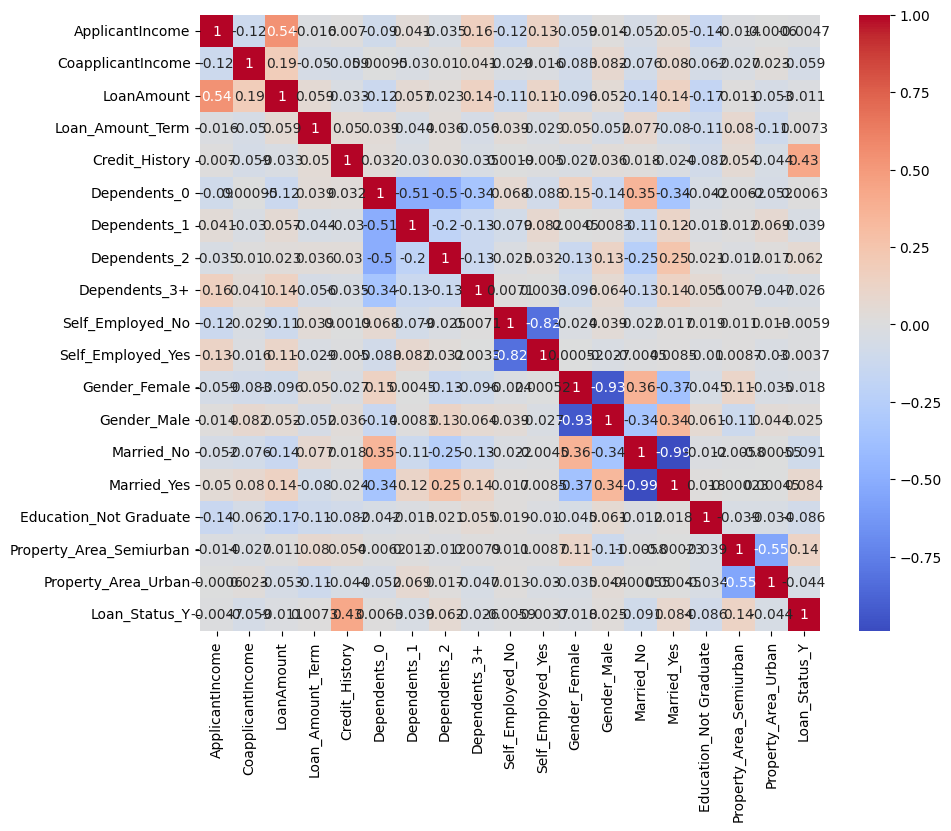

In [52]:
# 3. Feature Selection
# 3.1. Removing Redundant Features
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [53]:
# 3.2. Recursive Feature Elimination (RFE)
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Define the feature matrix (X) and target variable (y)
X = df.drop(columns=['LoanAmount',  'Loan_Status_Y'])
y = df['Loan_Status_Y']
X

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,360.0,1.0,True,False,False,False,True,False,False,True,True,False,False,False,True
1,4583,1508.0,360.0,1.0,False,True,False,False,True,False,False,True,False,True,False,False,False
2,3000,0.0,360.0,1.0,True,False,False,False,False,True,False,True,False,True,False,False,True
3,2583,2358.0,360.0,1.0,True,False,False,False,True,False,False,True,False,True,True,False,True
4,6000,0.0,360.0,1.0,True,False,False,False,True,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,360.0,1.0,True,False,False,False,True,False,True,False,True,False,False,False,False
610,4106,0.0,180.0,1.0,False,False,False,True,True,False,False,True,False,True,False,False,False
611,8072,240.0,360.0,1.0,False,True,False,False,True,False,False,True,False,True,False,False,True
612,7583,0.0,360.0,1.0,False,False,True,False,True,False,False,True,False,True,False,False,True


In [54]:
# Initialize a linear regression model
model = LinearRegression()

# Apply Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
fit = rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[fit.support_]
print("Selected Features: ", selected_features)

Selected Features:  Index(['Credit_History', 'Dependents_2', 'Married_No', 'Married_Yes',
       'Property_Area_Semiurban'],
      dtype='object')


In [55]:
# 4. Model Building
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

In [56]:
#Train the Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.18191074699563034
